# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


1 - Is the distribution of body temperatures normal?

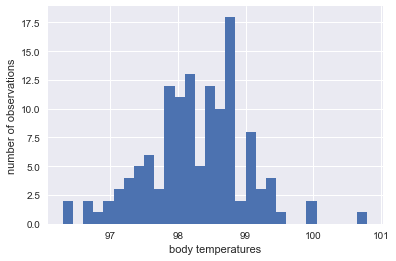

In [3]:
plt.hist(df.temperature, bins=30)
plt.xlabel("body temperatures")
plt.ylabel("number of observations")

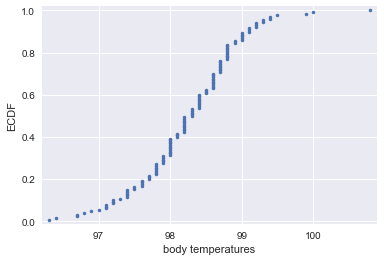

In [4]:
x = np.sort(df.temperature)
y = np.arange(1, len(x)+1)/len(x)
plt.plot(x, y, marker=".", linestyle='none')
plt.xlabel("body temperatures")
plt.ylabel("ECDF")
plt.margins(0.02)

In [5]:
np.mean(df.temperature)

98.24923076923078

In [6]:
np.std(df.temperature)

0.7303577789050377

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

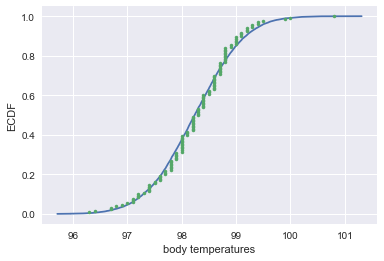

In [8]:
#the best way to guarantee that this is a normal distribuition is by 
#ploting what a normal distrbuiton would be using the mean and standard deviaton of the data.
mean = np.mean(df.temperature)
std = np.std(df.temperature)
x, y = ecdf(df.temperature)

# for the normal distribuition
samples = np.random.normal(mean, std, size=10000)
x_theor, y_theor = ecdf(samples)

#plotting
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker=".", linestyle='none')
plt.xlabel("body temperatures")
plt.ylabel("ECDF")

1 - Is the distribution of body temperatures normal?
Yes, by this last plot we can assume that the body temperature has a normal distribuition, as the green dots from the data are really close to the blue line of the theoretical normal distribuition for the mean and standard deviation of the data.

2 - Is the sample size large? Are the observations independent?

In [9]:
len(df.temperature)

130

2 - Is the sample size large? Are the observations independent?
Yes, the sample size is sufficiently large if is above 30 observations, on this data there are 130 observations.
Probably yes, the way to verify would be to look into the technique used to measure the observations.

3 - Is the true population mean really 98.6 degrees F?
        Would you use a one-sample or two-sample test? Why?
        In this situation, is it appropriate to use the  tt  or  zz  statistic?
        Now try using the other test. How is the result be different? Why?

The way to check if the population mean is really 98.6 degrees is by doing hypothesis testing.
Let's make it clear what is our null hypothesis:
     "The body temperature of the population is 98.6 degrees"
Now we have to define our test statistic
    We will use One-sample tests, because it is more appropriate when a sample is being compared to the population from a hypothesis.
    In this situation will use the t-test as the standard deviation of the population is unknown.

In [10]:
pop_mean = 98.6
df.temp_shifted = df.temperature - np.mean(df.temperature) + pop_mean


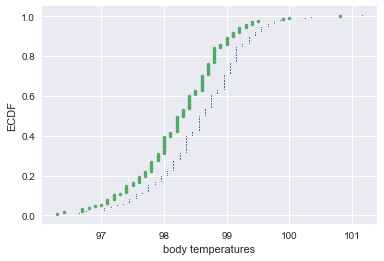

In [11]:
x_pop_mean, y_pop_mean = ecdf(df.temp_shifted)

plt.plot(x_pop_mean, y_pop_mean, marker=",", linestyle='none')
plt.plot(x, y, marker=".", linestyle='none')
plt.xlabel("body temperatures")
plt.ylabel("ECDF")

In [12]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [13]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

(array([  5.00000000e+00,   2.13000000e+02,   2.24300000e+03,
          1.11450000e+04,   2.79620000e+04,   3.31610000e+04,
          1.93150000e+04,   5.26600000e+03,   6.54000000e+02,
          3.60000000e+01]),
 array([ 98.30384615,  98.36038462,  98.41692308,  98.47346154,
         98.53      ,  98.58653846,  98.64307692,  98.69961538,
         98.75615385,  98.81269231,  98.86923077]),
 <a list of 10 Patch objects>)

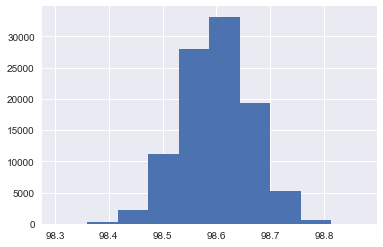

In [14]:
bs_replicates = draw_bs_reps(df.temp_shifted, np.mean, 100000)
plt.hist(bs_replicates)

In [15]:
p_value = np.sum(bs_replicates<= np.mean(df.temperature)) / 100000
p_value

0.0

In [16]:
np.sort(bs_replicates)

array([ 98.30384615,  98.33230769,  98.34769231, ...,  98.85461538,
        98.86846154,  98.86923077])

In [17]:
np.mean(df.temperature)

98.24923076923078

In [18]:
#Another way to do is by using scipy.stats
from scipy import stats
stats.ttest_1samp(df.temperature, 98.6)


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

and by using two different methods we get to the same conclusion:
as the p-value is very, very small its unlikely that the body temperature's mean of the population is 98.6 degrees.

(Now try using the other test. How is the result be different? Why?)
So the other test would be the z test, for this we will assume that the standard deviation of the population is equal to the sample as the sample is large enough for CLT to apply.

In [19]:
z = (np.mean(df.temperature) - 98.6)/(np.std(df.temperature) / np.sqrt(len(df.temperature)))
z

-5.4759252020781162

In [20]:
p_value = stats.norm.cdf(z) * 2
p_value

4.3523151658821886e-08

The resulting p-value is also very small so the null hypothesis is also rejected when using the z-test.

4 - At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [21]:
marg_of_error = 1.96*np.std(df.temperature)/np.sqrt(len(df.temperature))
marg_of_error

0.12555096480257899

In [22]:
conf_int = np.mean(df.temperature) + np.array([-1,1])*marg_of_error
conf_int

array([ 98.1236798 ,  98.37478173])

In [23]:
#using the bootstrap replicates is another way of doing it
bs_replicates = draw_bs_reps(df.temperature, np.mean, 100000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([ 98.12461538,  98.37461538])

Either under 98.1 or over 98.4 could be considered "abnormal" body temperature.

5 - Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

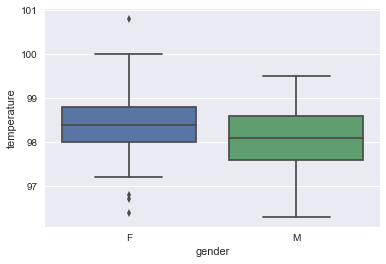

In [24]:
#first we will take a look at the data through a boxplot
sns.boxplot(df.gender, df.temperature, data=df)

In [25]:
#from the box plots above we can see a difference in the body temperature, according to gender. 
#Now we have to find out if is a significant difference...
df_F = df[df.gender == 'F']
df_M = df[df.gender == 'M']

In [26]:
np.mean(df_F.temperature)

98.39384615384613

In [27]:
np.mean(df_M.temperature)

98.1046153846154

In [28]:
np.std(df_F.temperature)

0.7377464486428966

In [29]:
np.std(df_M.temperature)

0.6933598841828696

In [30]:
np.mean(df_F.temperature) - np.mean(df_M.temperature)

0.289230769230727

In [31]:
# to test if the male and female body temperature means are equal we'll use a NHST by permutation the samples

#demonstration of a permutation sample
temp_perm = np.random.permutation(df.temperature)
perm_sample_F = temp_perm[:len(df_F)]
perm_sample_M = temp_perm[len(df_F):]
np.mean(perm_sample_F) - np.mean(perm_sample_M)

-0.2430769230769414

In [32]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [33]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [34]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [35]:
empirical_diff_means = diff_of_means(df_F.temperature, df_M.temperature)
perm_replicates = draw_perm_reps(df_F.temperature, df_M.temperature, diff_of_means, size=10000)
# Calculate p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
p

0.0111

In [36]:
p*100


1.1100000000000001

So according to the calculations the means of men and women are equal(null hypothesis) in 1%, as the p_value is below 0.05 we reject the null hypothesis 

It's quite interesting for me this result, because when I was working in cubicles together there was a commom complaning of the air conditioning temperature between men and women. While women were felling cold, men would ask to lower even more the temperature because they were feeling hot. Super interesting this exercise!!!